In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#Categorical Data Encoding

data = pd.read_csv('/content/gdrive/MyDrive/BOOTCAMP DIBIMBING/DAY 7 - DATA PROCESSING/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [8]:
#Label Encoding
from sklearn import preprocessing

In [9]:
data['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [10]:
le = preprocessing.LabelEncoder()
le.fit(data['OnlineSecurity'])
data['OnlineSecurity_label_encoding'] = le.transform(data['OnlineSecurity']) 

In [11]:
Embarked_Label_Encoding = data[['OnlineSecurity','OnlineSecurity_label_encoding',]]
Embarked_Label_Encoding.head()

,OnlineSecurity,OnlineSecurity_label_encoding
0,No,0
1,Yes,2
2,Yes,2
3,Yes,2
4,No,0


In [12]:
# Ordinal Coding

map_Contract = {'Month-to-month':0,
             'One year':1,
             'Two year':2}
data['Contract_cat'] = data['Contract'].map(map_Contract)
data[['Contract','Contract_cat']].head(5)

,Contract,Contract_cat
0,Month-to-month,0
1,One year,1
2,Month-to-month,0
3,One year,1
4,Month-to-month,0


In [13]:
# Frequency Encoding

freq_et = data['PaymentMethod'].value_counts().reset_index()
freq_et.rename(columns={"index": "PaymentMethod", "PaymentMethod": "freq_PaymentMethod"}, inplace = True)
freq_et['pct_PaymentMethod'] = round((freq_et['freq_PaymentMethod']/freq_et['freq_PaymentMethod'].sum())*100,2)
freq_et = freq_et[['PaymentMethod','pct_PaymentMethod']]
freq_et

,PaymentMethod,pct_PaymentMethod
0,Electronic check,33.58
1,Mailed check,22.89
2,Bank transfer (automatic),21.92
3,Credit card (automatic),21.61


In [14]:
data = data.merge(freq_et[['PaymentMethod','pct_PaymentMethod']], on='PaymentMethod', how='inner')
data[['PaymentMethod','pct_PaymentMethod']]

,PaymentMethod,pct_PaymentMethod
0,Electronic check,33.58
1,Electronic check,33.58
2,Electronic check,33.58
3,Electronic check,33.58
4,Electronic check,33.58
...,...,...
7038,Credit card (automatic),21.61
7039,Credit card (automatic),21.61
7040,Credit card (automatic),21.61
7041,Credit card (automatic),21.61


In [15]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,OnlineSecurity_label_encoding,Contract_cat,pct_PaymentMethod
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,0,33.58
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,33.58
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,0,0,33.58
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,0,0,33.58
4,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No,2,0,33.58


In [16]:
data = data.drop('PaymentMethod', axis = 1)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,OnlineSecurity_label_encoding,Contract_cat,pct_PaymentMethod
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,29.85,29.85,No,0,0,33.58
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,70.70,151.65,Yes,0,0,33.58
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,99.65,820.5,Yes,0,0,33.58
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,104.80,3046.05,Yes,0,0,33.58
4,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Month-to-month,Yes,105.50,2686.05,No,2,0,33.58


In [17]:
# Sebelum masuk dalam mean coding, alangkah baiknya melakukan frequency encoding kembali untuk coloumn
# Coloum selanjutnya ialah "InternetService"

In [18]:
freq_et= data['InternetService'].value_counts().reset_index()
freq_et.rename(columns={"index": "InternetService", "InternetService": "freq_InternetService"}, inplace = True)
freq_et

,InternetService,freq_InternetService
0,Fiber optic,3096
1,DSL,2421
2,No,1526


In [19]:
#jumlah kemunculan 'InternetService' terhadap target/survived

sum_et = data.groupby(['InternetService']).agg({'SeniorCitizen':sum}).reset_index()
sum_et.rename(columns={"SeniorCitizen": "sum_InternetService"}, inplace = True)
sum_et

,InternetService,sum_InternetService
0,DSL,259
1,Fiber optic,831
2,No,52


In [20]:
#Setelah dilakukan frequency coding dan dijumlahkan, tahap selanjutnya melakukan mean_coding pada 'InternetService'

In [21]:
mean_ec = freq_et.merge(sum_et, on='InternetService', how='inner')
mean_ec['mean_ec_InternetService'] = round((mean_ec['sum_InternetService']/mean_ec['freq_InternetService']),2)
mean_ec = mean_ec[['InternetService','mean_ec_InternetService']]
mean_ec

,InternetService,mean_ec_InternetService
0,Fiber optic,0.27
1,DSL,0.11
2,No,0.03


In [22]:
#Penggabungan data dari awal
data = data.merge(mean_ec, on='InternetService', how='inner')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,OnlineSecurity_label_encoding,Contract_cat,pct_PaymentMethod,mean_ec_InternetService
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,29.85,29.85,No,0,0,33.58,0.11
1,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,Month-to-month,Yes,39.65,39.65,Yes,0,0,33.58,0.11
2,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,Month-to-month,No,30.20,30.2,Yes,0,0,33.58,0.11
3,4080-IIARD,Female,0,Yes,No,13,Yes,Yes,DSL,Yes,...,No,Month-to-month,Yes,76.20,981.45,No,2,0,33.58,0.11
4,5122-CYFXA,Female,0,No,No,3,Yes,No,DSL,No,...,Yes,Month-to-month,Yes,75.30,244.1,No,0,0,33.58,0.11


In [23]:
#Outlier Handling

In [24]:
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [25]:
from scipy import stats

<function matplotlib.pyplot.tight_layout>

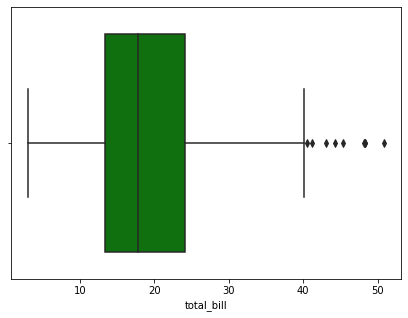

In [26]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(data['total_bill'],color='green',orient='h')

plt.tight_layout  

In [27]:
data[['total_bill']].describe()

,total_bill
count,244.000000
mean,19.785943
std,8.902412
min,3.070000
25%,13.347500
50%,17.795000
75%,24.127500
max,50.810000


In [28]:
#Handling dengan Z-Score

print('Jumlah baris sebelum handling outlier pada kolom total_bill:', len(data))
data['total_bill zscore'] = abs(stats.zscore(data['total_bill']))
data.head()

Jumlah baris sebelum handling outlier pada kolom total_bill: 244


,total_bill,tip,sex,smoker,day,time,size,total_bill zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [29]:
data = data[data['total_bill zscore'] < 3]
print(f'Jumlah baris setelah memfilter outlier:', len(data))
data.head()

Jumlah baris setelah memfilter outlier: 240


,total_bill,tip,sex,smoker,day,time,size,total_bill zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [30]:
(244-240)/244*100

1.639344262295082

<function matplotlib.pyplot.tight_layout>

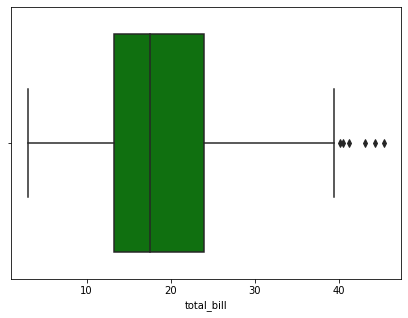

In [31]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(data['total_bill'],color='green',orient='h')

plt.tight_layout  

In [32]:
#Handing outlier dengan IQR

Q1 = data['total_bill'].quantile(0.25)
Q3 = data['total_bill'].quantile(0.75)
IQR = Q3 - Q1
IQR

10.6875

In [33]:
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)

low_limit, high_limit

(-2.75375, 39.99625)

In [34]:
#Setelah mendapatkan nilai low limit dan high limit,
#mencari data yang lebih tinggi dari low limit
#dan mencari data yang lebih rendah dibandingkan dengan high limit
#dalam artian mencari nilai diantara low limit dan high limit

In [35]:
filtered_entries = ((data['total_bill'] >= low_limit) & (data['total_bill'] <= high_limit))
data = data[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier:', len(data))
data.head()

Jumlah baris setelah memfilter outlier: 234


,total_bill,tip,sex,smoker,day,time,size,total_bill zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [36]:
(244-234)/244*100

4.098360655737705

<function matplotlib.pyplot.tight_layout>

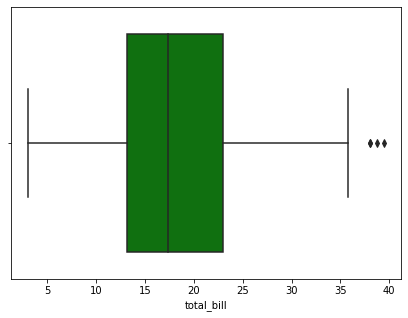

In [37]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(data['total_bill'],color='green',orient='h')

plt.tight_layout  

In [38]:
data['log total_bill'] = np.log(data['total_bill']+1)

<function matplotlib.pyplot.tight_layout>

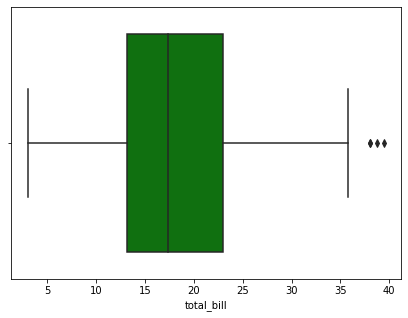

In [39]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(data['total_bill'],color='green',orient='h')

plt.tight_layout  

In [ ]:
#Dalam data ini di ketahui bahwa lebih baik menganalisa dengan dua kemungkinan
#agar bisa membandingkan lebih baik dan bisa melihat jumlah outlier yang benar-benar valid

#Perubahan pada boxplot tidak terlalu menunjukkan perubahan yang siginfikan karena terdapat data outlier yang sedikit